In [1]:
# Задание 1 
# Импорт пакетов, которые будут нужны при написании формулы

import pandas as pd
import datetime
import math

In [2]:
# Чтение данных и предварительный анализ на наличие пропущенных значений
reg_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-shanina/shared/problem1-reg_data.csv', sep=';')
reg_data.isna().sum()

reg_ts    0
uid       0
dtype: int64

In [3]:
# Чтение данных и предварительный анализ на наличие пропущенных значений
auth_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-shanina/shared/problem1-auth_data.csv', sep=';')
auth_data.isna().sum()

auth_ts    0
uid        0
dtype: int64

In [4]:
# Формула n-day retention
def retention_rate(n):
    reg_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-shanina/shared/problem1-reg_data.csv', sep=';')
    auth_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-shanina/shared/problem1-auth_data.csv', sep=';')
    reg_data['reg_day'] = pd.to_datetime(reg_data.reg_ts, unit = 's').astype('datetime64[D]')
    auth_data['auth_day'] = pd.to_datetime(auth_data.auth_ts, unit = 's').astype('datetime64[D]')
    all_data = auth_data.merge(reg_data, how = 'left', on='uid')
    all_data['days_from_reg'] = all_data.auth_day - all_data.reg_day
    query_number_of_days = f"days_from_reg == '{n} days'"
    return all_data.groupby(['uid', 'auth_day', 'reg_day', 'days_from_reg'], as_index=False) \
                   .agg({'auth_ts': 'count'}) \
                   .query(query_number_of_days) \
                   .days_from_reg.count()/all_data.uid.nunique()

In [5]:
# Проверка работы формулы, расчет 3-days retention
retention_rate(3)

0.046338

In [6]:
# Более развернуто решение данной задачи описано в "final_project_e-shanina.md"

In [7]:
# Задание 2 
# Импорт пакетов, которые будут нужны при проведении теста

import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

from tqdm.auto import tqdm

plt.style.use('ggplot')

from scipy.stats import mannwhitneyu

In [8]:
# Чтение файла с данными

df_ab = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-shanina/shared/problem2.csv', sep=';')

In [9]:
# Проверка на наличие пропущенных значений в данных

df_ab.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

In [10]:
# Проверка, в какой пропорции пользователи делятся между контрольной и тестовой группами

df_ab.testgroup.value_counts(normalize=True)

b    0.500697
a    0.499303
Name: testgroup, dtype: float64

In [11]:
# Описание целевой переменной - revenue
df_ab.revenue.describe()

count    404770.000000
mean         26.083435
std         681.652928
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       37433.000000
Name: revenue, dtype: float64

In [12]:
# Перевод переменной revenue в бинарную, чтобы абстрагироваться от среднего чека и посчитать конверсию в покупку. 
df_ab['revenue_binar'] = (df_ab.revenue > 0 ) * 1

In [13]:
# Расчет описательных статистик 
df_ab.groupby('testgroup').agg({'revenue_binar': ['count', 'mean', 'median', 'sum'], 'revenue': ['count', 'mean', 'median', 'sum']})


revenue_binar                        revenue                    \
                  count      mean median   sum   count       mean median   
testgroup                                                                  
a                202103  0.009540      0  1928  202103  25.413720      0   
b                202667  0.008906      0  1805  202667  26.751287      0   

                    
               sum  
testgroup           
a          5136189  
b          5421603

In [14]:
# Мы видим, что средняя выручка и обзая выручка больше в тестовой группе, но конверсия в покупку больше в контрольной группе. 
# Более 99% пользователей не совершают покупки, поэтому медианы = 0. 

In [15]:
# Создание двух датасетов по каждой из групп отдельно
df_ab_control = df_ab.query("testgroup =='a'").groupby('user_id', as_index=False).agg({'revenue': 'sum'})
df_ab_test = df_ab.query("testgroup =='b'").groupby('user_id', as_index=False).agg({'revenue': 'sum'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fa94aba20>]],
      dtype=object)

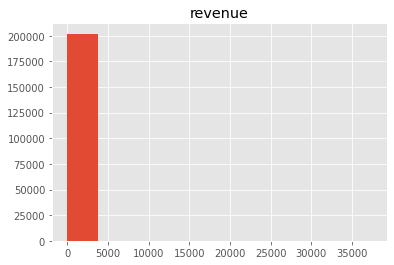

In [16]:
# Простроение гистограммы констроьной группы, с целью проверки распределения
df_ab.query("testgroup =='a'").hist('revenue')

In [17]:
# На графике видим, что распределение не похоже на нормальное, 
# Существует крупная группа одинаковых значений и несколько отличающихся (выбросов)

In [18]:
# Проведение теста на нормальность распределения с целью подтверждения вывода о том, что оно не является нормальным 
ss.normaltest(df_ab.query("testgroup =='a'").revenue)

NormaltestResult(statistic=585152.7312728433, pvalue=0.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fa6f4fba8>]],
      dtype=object)

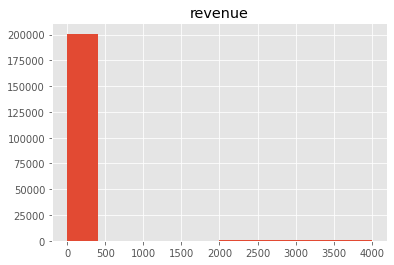

In [19]:
# Простроение гистограммы констроьной группы, с целью проверки распределения
df_ab.query("testgroup =='b'").hist('revenue') 

In [20]:
# На графике видим, что распределение не похоже на нормальное, 
# Существует крупная группа одинаковых значений и несколько отличающихся (выбросов)

In [21]:
# Проведение теста на нормальность распределения с целью подтверждения вывода о том, что оно не является нормальным 
ss.normaltest(df_ab.query("testgroup =='b'").revenue) 

NormaltestResult(statistic=326622.39540856465, pvalue=0.0)

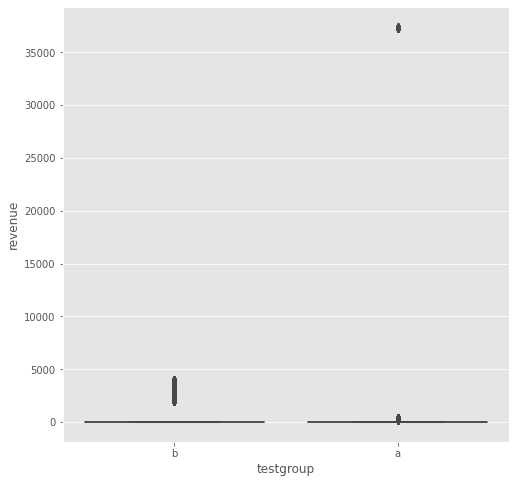

In [22]:
# Построение boxplot-а для более наглядной демонстрации групп платящих пользователей

plt.figure(figsize=(8,8))
sns.boxplot(x='testgroup', y='revenue', data=df_ab)

In [23]:
# По boxplot-у мы видим, что в контрольной группе есть две категории платящих пользователей: совершившие покупку на низкий чек
# и совершившие покупки на очень курпную сумму. В тестовой группе есть одна группа пользователей со средними чеками. 
# Предположим, что контрольной группе были предложены акционные предложения низкой и высокой ценовых категорий,
# тестовой группе были предложены акционные предложения средней ценовой категории. 

In [24]:
# Так как наша основная задача - выяснить, какой набор акционных предложений можно считать лучшим, 
# необходимо провести A/B тестирование. 
# Целью тестирования является определение, является ли рост средней выручки на пользователя в тестовой группе случайным. 

In [25]:
# Объявление функции, которая позволит проверять гипотезы с помощью бутстрапа

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}


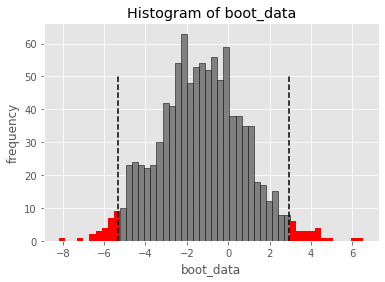

In [26]:
# Применение функции к данным. В результате хранится разница двух распределений, доверительный интервал и p-value

booted_data = get_bootstrap(df_ab_control.revenue, df_ab_test.revenue)

In [27]:
# P-value - вероятность, что различия в средней выручке на пользователя случайны

booted_data["p_value"] 

0.5336995807238125

In [28]:
# 95%-ный доверительный интервал 

booted_data["quants"] 

,0
0.025,-5.310610
0.975,2.930254


In [29]:
# В результате теста было получено очень высокое p-value, что говорит о том, что различия в средней выручке между 
# экспериментальными группами случайны с вероятностью 54.27%. Доверительный интервал содержит 0, это значит, что мы принимаем
# нулевую гипотезу, нет различий между выручкой в тестовой и контрольной группах. 
# Данный результат может быть обусловлен тем, что платящая аудитория очень мала. Поэтому если учитывать и размер чека, и 
# конверсию в покупку, различия будут незначимыми. 

In [30]:
# Рассмотрим только платящих пользователей, так как они являются целевой аудиторией при изменении набора акционных предложений

df_ab_paying = df_ab.query("revenue_binar == 1")
df_ab_paying_control = df_ab_paying.query("testgroup =='a'").groupby('user_id', as_index=False).agg({'revenue': 'sum'})
df_ab_paying_test = df_ab_paying.query("testgroup =='b'").groupby('user_id', as_index=False).agg({'revenue': 'sum'})

In [31]:
# Расчет описательных статистик для платящих пользователей

df_ab_paying.groupby('testgroup').agg({'revenue': ['mean', 'median', 'sum', 'count']})

revenue                      
                  mean median      sum count
testgroup                                   
a          2663.998444    311  5136189  1928
b          3003.658172   3022  5421603  1805

In [32]:
# Мы видим, что средняя, медианная и общая выручка больше в тестовой группе, количество платящих пользователей больше в 
# контрольной группе. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fa64dba90>]],
      dtype=object)

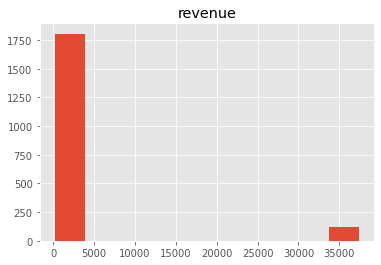

In [33]:
df_ab_paying_control.hist('revenue') 

In [34]:
# На графике видим, что распределение не похоже на нормальное, 
# Существует крупная группа одинаковых значений и несколько отличающихся (выбросов)

In [35]:
# Проведение теста на нормальность распределения с целью подтверждения вывода о том, что оно не является нормальным 
ss.normaltest(df_ab_paying.query("testgroup =='a'").revenue)

NormaltestResult(statistic=1394.9457843086925, pvalue=1.2341605505935488e-303)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fa646a208>]],
      dtype=object)

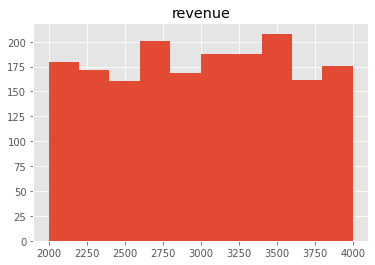

In [36]:
df_ab_paying_test.hist('revenue') 

In [37]:
# Проведение теста на нормальность распределения с целью подтверждения вывода о том, что оно не является нормальным 
ss.normaltest(df_ab_paying.query("testgroup =='b'").revenue)

NormaltestResult(statistic=1068.8600084412267, pvalue=7.943249488371762e-233)

In [38]:
# Так как выручка контрольной группы имеет ярко выраженные выбросы, каждый из которых существенно влияет на среднее, 
# более корректно сравнить медианные значения выручки в контрольной и тестовой группах. Для этого также используем Bootstrap.

In [39]:
# Объявление функции, которая позволит проверять гипотезы с помощью бутстрапа

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}


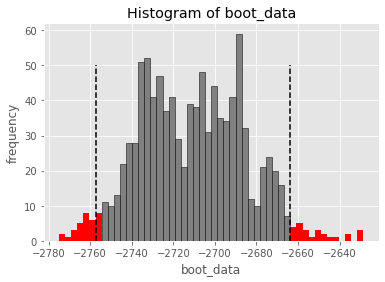

In [40]:
# Применение функции к данным. В результате хранится разница двух распределений, доверительный интервал и p-value

booted_data = get_bootstrap(df_ab_paying_control.revenue, df_ab_paying_test.revenue)

In [41]:
# P-value - вероятность, что различия в средней выручке на пользователя случайны

booted_data["p_value"] 

0.0

In [42]:
# 95%-ный доверительный интервал 

booted_data["quants"] 

,0
0.025,-2757.0125
0.975,-2663.9625


In [43]:
# В результате теста было получено очень низкое p-value, что говорит о том, что различия в средней выручке между 
# экспериментальными группами не являются случайными. Доверительный интервал не содержит 0, это значит, что мы отклоняем
# нулевую гипотезу, различия между медианной выручкой пользователя в тестовой и контрольной группах значимы, в тестовой группе 
# медианная выручка больше.

In [44]:
# Расчет статистик только для пользователей из контрольной группы с крупным чеком (свыше 5000)

df_ab_high_check = df_ab.query("revenue > 5000")
df_ab_high_check.revenue.describe()

count      123.000000
mean     37319.121951
std         25.442183
min      37293.000000
25%      37301.000000
50%      37311.000000
75%      37329.000000
max      37433.000000
Name: revenue, dtype: float64

In [45]:
# Видим, что пользователей с высоким чеком очень мало (123), стандартное отклонение очень небольшое. 

In [46]:
# Расчет статистик только для платящих пользователей c чеком ниже 5000

df_ab_low_check = df_ab.query("0 < revenue < 5000")
df_ab_low_check.groupby('testgroup').agg({'revenue': ['mean', 'median', 'sum', 'count']})

revenue                      
                  mean median      sum count
testgroup                                   
a           302.458172    305   545937  1805
b          3003.658172   3022  5421603  1805

In [47]:
# Видим, что при исключении выбросов среднее тестовой группы становится в 10 раз выше среднего в контрольной группе.

In [48]:
# Более развернуто подход и интерпретация результатов данной задачи описаны в "final_project_e-shanina.md"

In [49]:
# Ответ на задание 3 представлен в "final_project_e-shanina.md"